<a href="https://colab.research.google.com/github/Karanam-Mithul/IPO-Market-Comprehensive-Exploratory-Data-Analysis/blob/main/Initial_Public_Offering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IPO Market – Comprehensive Exploratory Data Analysis**

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from datetime import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

import openpyxl

In [8]:
file_path = "Initial Public Offering.xlsx"
df = pd.read_excel(file_path)

print("Shape of dataset:", df.shape)

print("\nColumn names:")
print(df.columns.tolist())

print("\nFirst 5 rows:")
print(df.head())

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nBasic statistics for numeric columns:")
print(df.describe().T)  # Transpose for better readability


Shape of dataset: (561, 13)

Column names:
['Date', 'IPO_Name', 'Issue_Size(crores)', 'QIB', 'HNI', 'RII', 'Total', 'Offer Price', 'List Price', 'Listing Gain', 'CMP(BSE)', 'CMP(NSE)', 'Current Gains']

First 5 rows:
        Date                                   IPO_Name  Issue_Size(crores)  \
0 2025-08-06                      M & B Engineering Ltd              650.00   
1 2025-08-06          Sri Lotus Developers & Realty Ltd              792.00   
2 2025-08-06  National Securities Depository Ltd (NSDL)             4011.60   
3 2025-08-05                        Aditya Infotech Ltd             1300.00   
4 2025-08-05                    Laxmi India Finance Ltd              254.26   

      QIB    HNI    RII   Total  Offer Price  List Price  Listing Gain  \
0   36.72  38.24  32.55   36.20          385       386.0          0.26   
1  163.90  57.71  20.28   69.14          150       179.1         19.40   
2  103.97  34.98   7.73   41.01          800       880.0         10.00   
3  133.21  7

# **Basic Statistics**


In [9]:
df = df.dropna(axis=1, how='all')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df.columns)

Index(['Date', 'IPO_Name', 'Issue_Size(crores)', 'QIB', 'HNI', 'RII', 'Total',
       'Offer Price', 'List Price', 'Listing Gain', 'CMP(BSE)', 'CMP(NSE)',
       'Current Gains'],
      dtype='object')


In [10]:
numeric_df = df.select_dtypes(include=[np.number])
basic_stats = numeric_df.describe().T
basic_stats['median'] = numeric_df.median()
basic_stats = basic_stats[['mean', 'median', 'min', 'max']]

print(basic_stats)

                           mean   median    min       max
Issue_Size(crores)  1411.483957  592.000  23.00  27858.80
QIB                   47.477013   13.720   0.00    331.60
HNI                   74.686834   13.200   0.00    958.07
RII                   15.972165    5.120   0.00    374.81
Total                 37.568891   11.520   0.11    326.49
Offer Price          362.187166  258.000  10.00   2150.00
List Price           430.381480  293.000   9.50   2725.00
Listing Gain          18.029554    7.150 -31.73    252.76
CMP(BSE)             673.822487  298.350   0.04  15924.10
CMP(NSE)             687.114047  303.200   0.05  15892.00
Current Gains         83.798749   14.675 -99.93   2523.67


In [11]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [12]:
df['IPO_Year'] = df['Date'].dt.year

df['Listing_Gain_Calc'] = ((df['List Price'] - df['Offer Price']) / df['Offer Price']) * 100

df['Oversubscription_Ratio'] = df['Total']

# 4. Categorizing IPOs by size
def categorize_issue_size(size):
    if size < 500:
        return 'Small-Cap IPO'
    elif 500 <= size < 2000:
        return 'Mid-Cap IPO'
    else:
        return 'Large-Cap IPO'

df['IPO_Size_Category'] = df['Issue_Size(crores)'].apply(categorize_issue_size)

df['Gain_Category'] = df['Listing Gain'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')

print(df[['IPO_Name', 'IPO_Year', 'Listing_Gain_Calc', 'Oversubscription_Ratio', 'IPO_Size_Category', 'Gain_Category']].head())


                                    IPO_Name  IPO_Year  Listing_Gain_Calc  \
0                      M & B Engineering Ltd      2025           0.259740   
1          Sri Lotus Developers & Realty Ltd      2025          19.400000   
2  National Securities Depository Ltd (NSDL)      2025          10.000000   
3                        Aditya Infotech Ltd      2025          50.814815   
4                    Laxmi India Finance Ltd      2025         -13.924051   

   Oversubscription_Ratio IPO_Size_Category Gain_Category  
0                   36.20       Mid-Cap IPO      Positive  
1                   69.14       Mid-Cap IPO      Positive  
2                   41.01     Large-Cap IPO      Positive  
3                  100.69       Mid-Cap IPO      Positive  
4                    1.87     Small-Cap IPO      Negative  


In [13]:
ipo_size_counts = df['IPO_Size_Category'].value_counts().reset_index()
ipo_size_counts.columns = ['IPO_Size_Category', 'Count']

fig = px.pie(ipo_size_counts,
             values='Count',
             names='IPO_Size_Category',
             title='Distribution of IPOs by Size Category',
             hole=0.3)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# **Year Wise Statistics**

,IPO_Year,IPO_Count
0,2010,74
1,2011,39
2,2012,11
3,2013,4
4,2014,6
5,2015,20
6,2016,27
7,2017,38
8,2018,24
9,2019,17


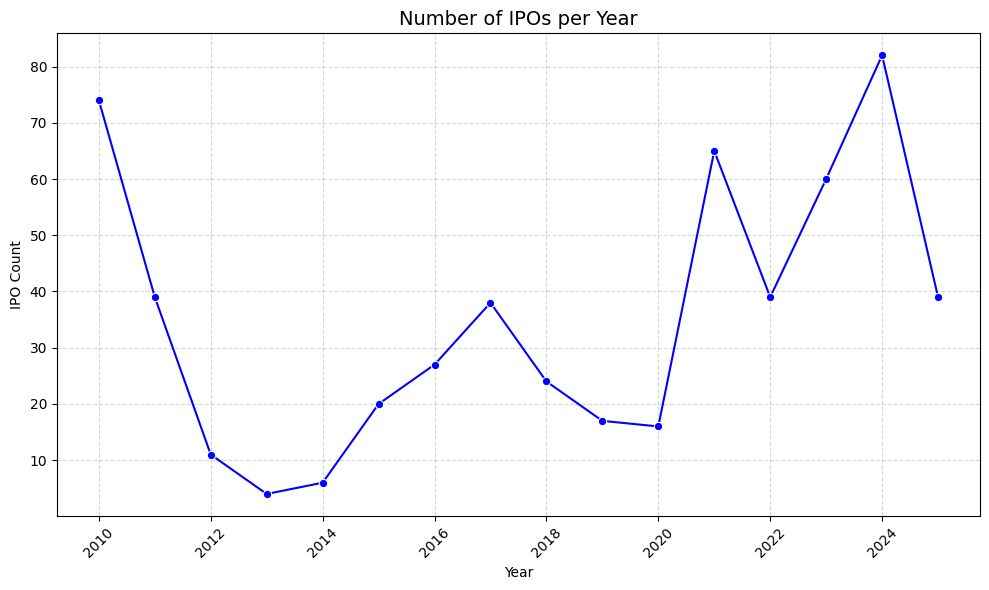

In [14]:
df['IPO_Year'] = df['IPO_Year'].astype('Int64')

ipos_per_year = df.groupby('IPO_Year')['IPO_Name'].count().reset_index()
ipos_per_year.rename(columns={'IPO_Name': 'IPO_Count'}, inplace=True)

display(ipos_per_year)

plt.figure(figsize=(10, 6))
sns.lineplot(data=ipos_per_year, x='IPO_Year', y='IPO_Count', marker='o', color='b')
plt.title('Number of IPOs per Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('IPO Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [15]:
df['IPO_Year'] = df['IPO_Year'].astype('Int64')

yearly_stats = df.groupby('IPO_Year').agg(
    IPO_Count = ('IPO_Name', 'count'),
    Avg_Listing_Gain = ('Listing Gain', 'mean'),
    Max_Listing_Gain = ('Listing Gain', 'max'),
    Avg_Issue_Size = ('Issue_Size(crores)', 'mean'),
    Avg_Oversubscription = ('Oversubscription_Ratio', 'mean')
).reset_index()

# Round for readability
yearly_stats = yearly_stats.round({
    'Avg_Listing_Gain': 2,
    'Max_Listing_Gain': 2,
    'Avg_Issue_Size': 2,
    'Avg_Oversubscription': 2
})

print("Year-wise IPO Statistics:")
display(yearly_stats)


Year-wise IPO Statistics:


,IPO_Year,IPO_Count,Avg_Listing_Gain,Max_Listing_Gain,Avg_Issue_Size,Avg_Oversubscription
0,2010,74,10.23,75.00,1013.92,16.18
1,2011,39,3.18,44.44,362.26,3.89
2,2012,11,5.31,34.40,621.52,10.97
3,2013,4,4.50,11.32,2060.61,19.82
4,2014,6,25.13,62.88,283.18,31.06
5,2015,20,6.55,40.49,650.01,13.95
6,2016,27,12.35,57.41,1003.96,30.13
7,2017,38,21.48,139.95,1953.36,43.88
8,2018,24,5.26,73.82,1293.50,27.76
9,2019,17,14.58,101.25,1006.58,34.01


    IPO_Month  IPO_Count
4     January         27
3    February         43
7       March         46
0       April         36
8         May         43
6        June         22
5        July         52
1      August         53
11  September         55
10    October         61
9    November         53
2    December         70


/tmp/ipython-input-3476194736.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




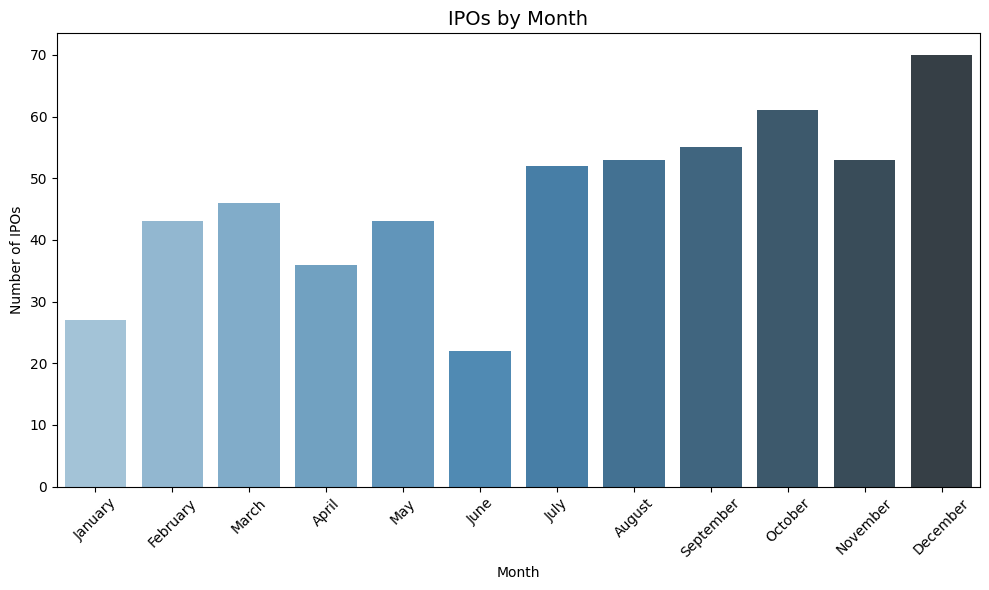

In [16]:
df['IPO_Month'] = df['Date'].dt.month_name()
ipos_by_month = df.groupby('IPO_Month').size().reset_index(name='IPO_Count')

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
ipos_by_month['IPO_Month'] = pd.Categorical(ipos_by_month['IPO_Month'], categories=month_order, ordered=True)
ipos_by_month = ipos_by_month.sort_values('IPO_Month')

print(ipos_by_month)

plt.figure(figsize=(10, 6))
sns.barplot(data=ipos_by_month, x='IPO_Month', y='IPO_Count', palette='Blues_d')
plt.title('IPOs by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of IPOs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

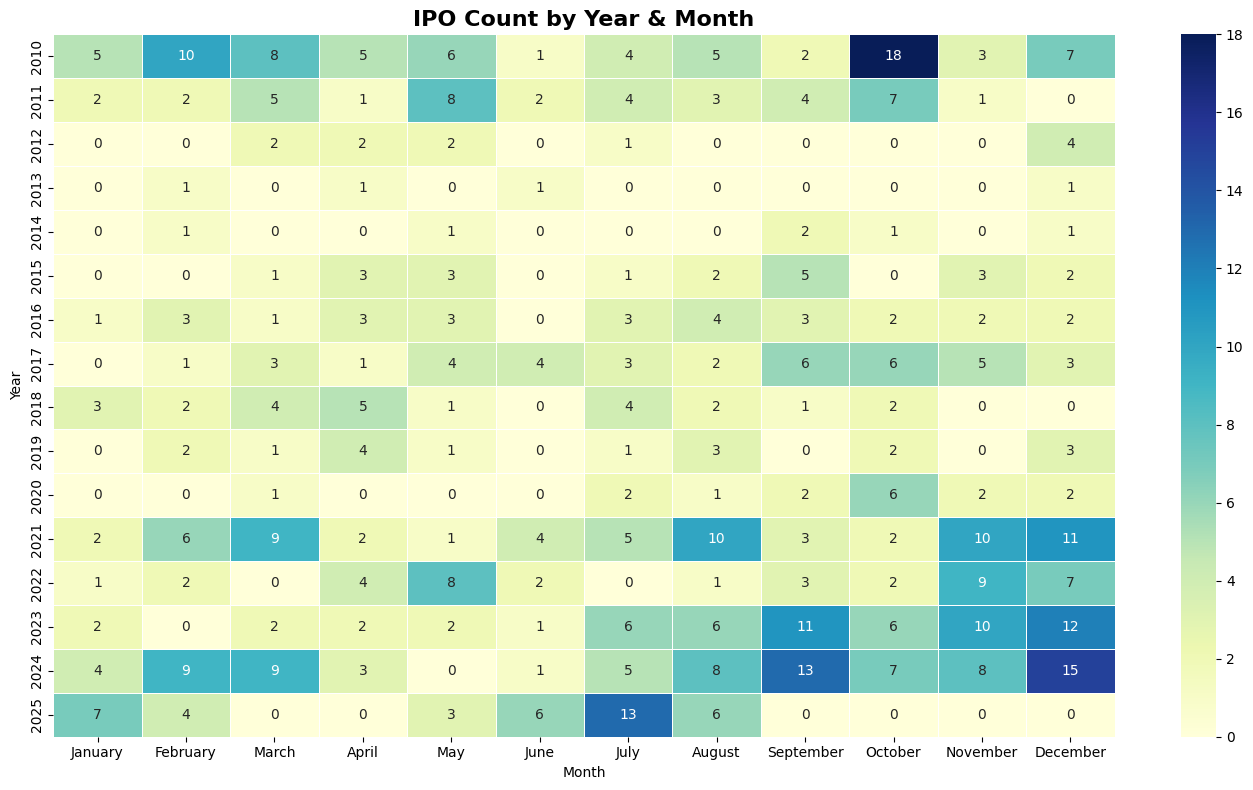

In [20]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['IPO_Year'] = df['Date'].dt.year.astype('Int64')
df['IPO_Month'] = df['Date'].dt.month_name()

heatmap_data = df.pivot_table(
    index='IPO_Year',
    columns='IPO_Month',
    values='IPO_Name',
    aggfunc='count'
).fillna(0)

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
heatmap_data = heatmap_data[month_order]

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=.5)
plt.title('IPO Count by Year & Month', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

# **Analysis**

Correlation Matrix:
                   QIB       HNI       RII  Listing Gain
QIB           1.000000  0.613444  0.437530      0.621803
HNI           0.613444  1.000000  0.542278      0.628970
RII           0.437530  0.542278  1.000000      0.515742
Listing Gain  0.621803  0.628970  0.515742      1.000000


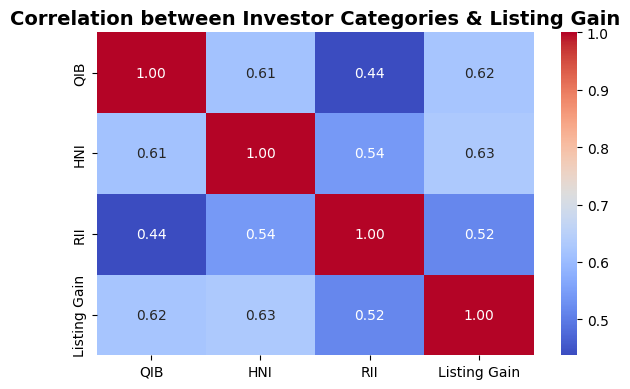

In [17]:
corr_df = df[['QIB', 'HNI', 'RII', 'Listing Gain']]

correlation_matrix = corr_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation between Investor Categories & Listing Gain', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


/tmp/ipython-input-4229815799.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-4229815799.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-4229815799.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



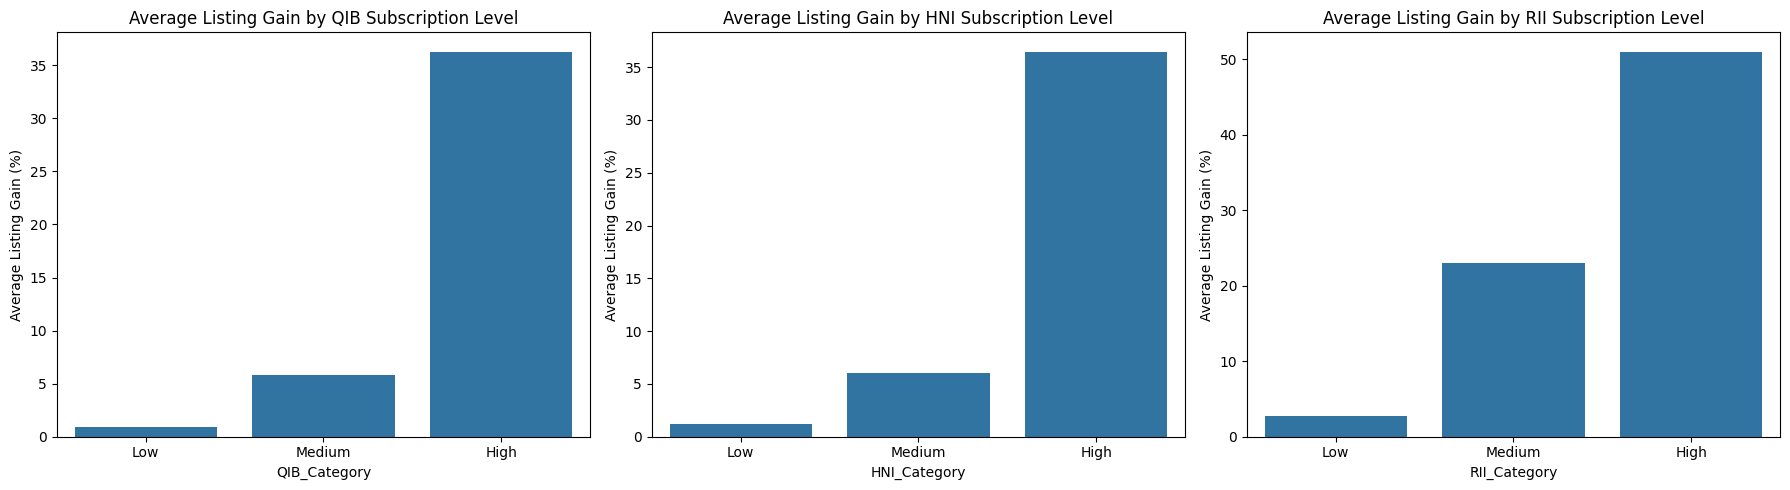

In [23]:
bins = [0, 5, 20, float('inf')]
labels = ['Low', 'Medium', 'High']

df['QIB_Category'] = pd.cut(df['QIB'], bins=bins, labels=labels)
df['HNI_Category'] = pd.cut(df['HNI'], bins=bins, labels=labels)
df['RII_Category'] = pd.cut(df['RII'], bins=bins, labels=labels)

qib_avg_gain = df.groupby('QIB_Category')['Listing Gain'].mean()
hni_avg_gain = df.groupby('HNI_Category')['Listing Gain'].mean()
rii_avg_gain = df.groupby('RII_Category')['Listing Gain'].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x=qib_avg_gain.index, y=qib_avg_gain.values, ax=axes[0])
axes[0].set_title('Average Listing Gain by QIB Subscription Level')
axes[0].set_ylabel('Average Listing Gain (%)')

sns.barplot(x=hni_avg_gain.index, y=hni_avg_gain.values, ax=axes[1])
axes[1].set_title('Average Listing Gain by HNI Subscription Level')
axes[1].set_ylabel('Average Listing Gain (%)')

sns.barplot(x=rii_avg_gain.index, y=rii_avg_gain.values, ax=axes[2])
axes[2].set_title('Average Listing Gain by RII Subscription Level')
axes[2].set_ylabel('Average Listing Gain (%)')

plt.tight_layout()
plt.show()

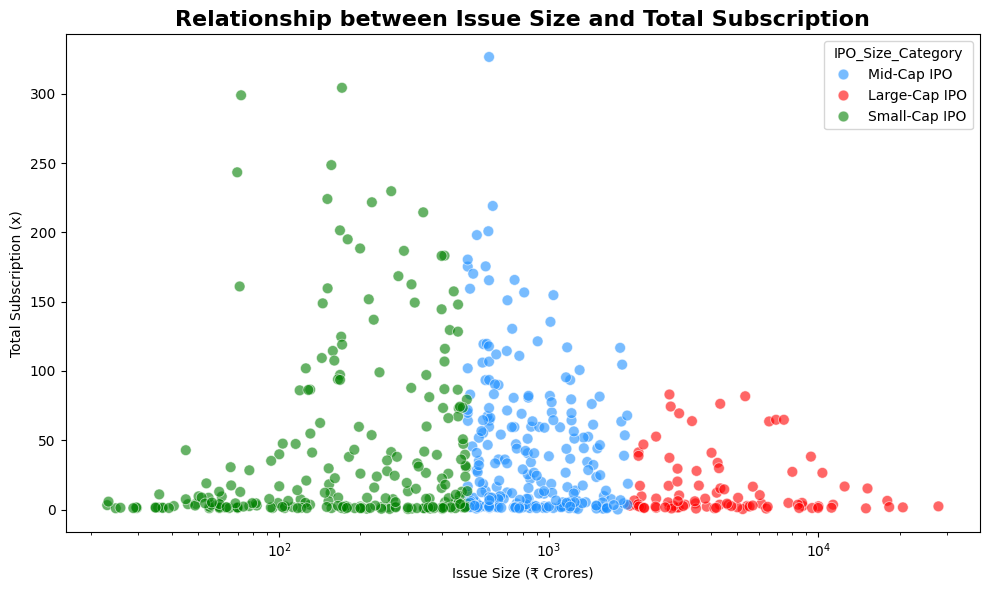

In [21]:
df['Issue_Size(crores)'] = pd.to_numeric(df['Issue_Size(crores)'], errors='coerce')
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Issue_Size(crores)',
    y='Total',
    hue='IPO_Size_Category',
    palette={'Small-Cap IPO': 'green',
             'Mid-Cap IPO': 'dodgerblue',
             'Large-Cap IPO': 'red'},
    alpha=0.6,
    s=60
)
plt.xscale('log')
plt.title('Relationship between Issue Size and Total Subscription', fontsize=16, weight='bold')
plt.xlabel('Issue Size (₹ Crores)')
plt.ylabel('Total Subscription (x)')
plt.tight_layout()
plt.show()

In [18]:
top_10_best = df.sort_values(by='Listing Gain', ascending=False).head(10)
top_10_worst = df.sort_values(by='Listing Gain', ascending=True).head(10)

print("Top 10 Best Listing Performers:")
print(top_10_best[['IPO_Name', 'Listing Gain', 'IPO_Year']])

print("\nTop 10 Worst Listing Performers:")
print(top_10_worst[['IPO_Name', 'Listing Gain', 'IPO_Year']])

Top 10 Best Listing Performers:
                                         IPO_Name  Listing Gain  IPO_Year
238                    Sigachi Industries Limited        252.76      2021
110                    Vibhor Steel Tubes Limited        178.81      2024
242  Paras Defence and Space Technologies Limited        171.43      2021
233                         Latent View Analytics        169.04      2021
45                       Mamata Machinery Limited        146.91      2024
133                     Tata Technologies Limited        139.99      2023
364                Salasar Techno Engineering Ltd        139.95      2017
116                        BLS E-Services Limited        128.89      2024
342                 Astron Paper & Board Mill Ltd        128.00      2017
81                       Premier Energies Limited        120.22      2024

Top 10 Worst Listing Performers:
                                   IPO_Name  Listing Gain  IPO_Year
471                  Vaswani Industries Ltd        -

# **Bullish / Bearish Market**

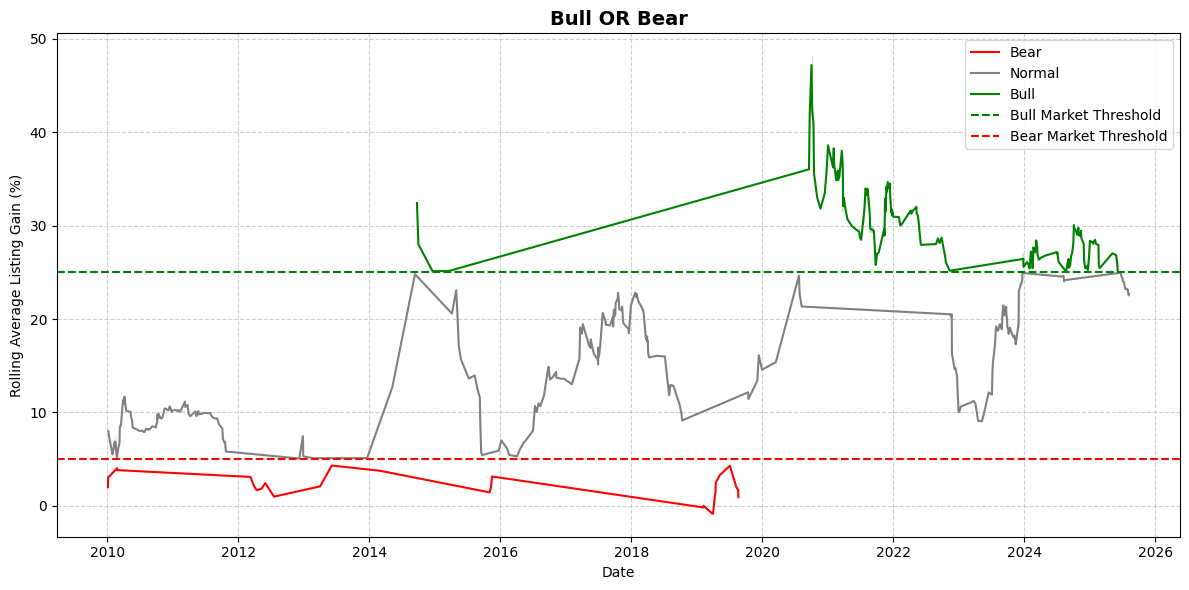

In [52]:
df_analysis = df.copy()

if 'Date' not in df_analysis.columns and df_analysis.index.name == 'Date':
    df_analysis.reset_index(inplace=True)

df_analysis.sort_values('Date', inplace=True)

df_analysis.set_index('Date', inplace=True)

df_analysis['Roll_Avg'] = df_analysis['Listing Gain'].rolling('365D').mean()

df_analysis['Cycle'] = 'Normal'
df_analysis.loc[df_analysis['Roll_Avg'] > 25, 'Cycle'] = 'Bull'
df_analysis.loc[df_analysis['Roll_Avg'] < 5,  'Cycle'] = 'Bear'

df_analysis.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_analysis, x='Date', y='Roll_Avg', hue='Cycle',
             palette={'Bull':'green','Bear':'red','Normal':'grey'})
plt.axhline(25, ls='--', c='green', label='Bull Market Threshold');
plt.axhline(5, ls='--', c='red', label='Bear Market Threshold');
plt.title('Bull OR Bear', fontsize=14, weight='bold');
plt.xlabel('Date')
plt.ylabel('Rolling Average Listing Gain (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# **Which Investor decides the market?**

In [46]:
df['Dominant_Investor'] = df[['QIB','HNI','RII']].idxmax(axis=1)

dominant_perf = (df.groupby('Dominant_Investor')
                   .agg(Avg_Listing_Gain=('Listing Gain','mean'),
                        Avg_Current_Gains=('Current Gains','mean'),
                        IPOs=('IPO_Name','count'))
                   .round(2))
display(dominant_perf)


/tmp/ipython-input-3817945575.py:1: FutureWarning:

The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError



,Avg_Listing_Gain,Avg_Current_Gains,IPOs
Dominant_Investor,,,
HNI,28.28,81.72,228
QIB,12.30,84.69,262
RII,6.33,90.23,69


# **Correlation matrix**

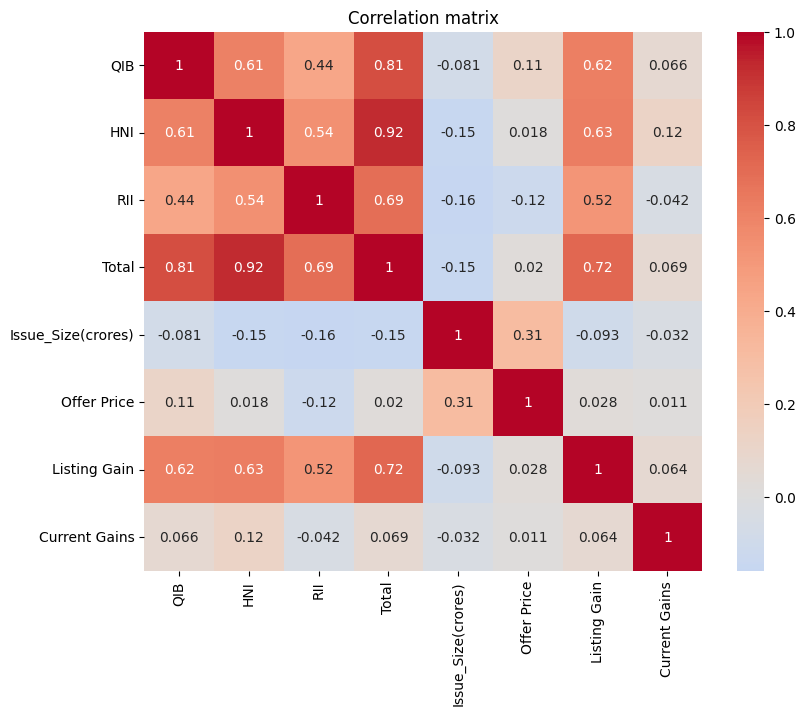

In [54]:
corr = df[['QIB','HNI','RII','Total','Issue_Size(crores)',
           'Offer Price','Listing Gain','Current Gains']].corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix')
plt.show()



# **Interactive Dashboard**

In [37]:
import plotly.express as px
fig = px.scatter(df, x='Total', y='Listing Gain',
                 size='Issue_Size(crores)', color='IPO_Size_Category',
                 hover_data=['IPO_Name','QIB','HNI','RII'],
                 title='Subscription vs Listing Gain – hover for details')
fig.show()
